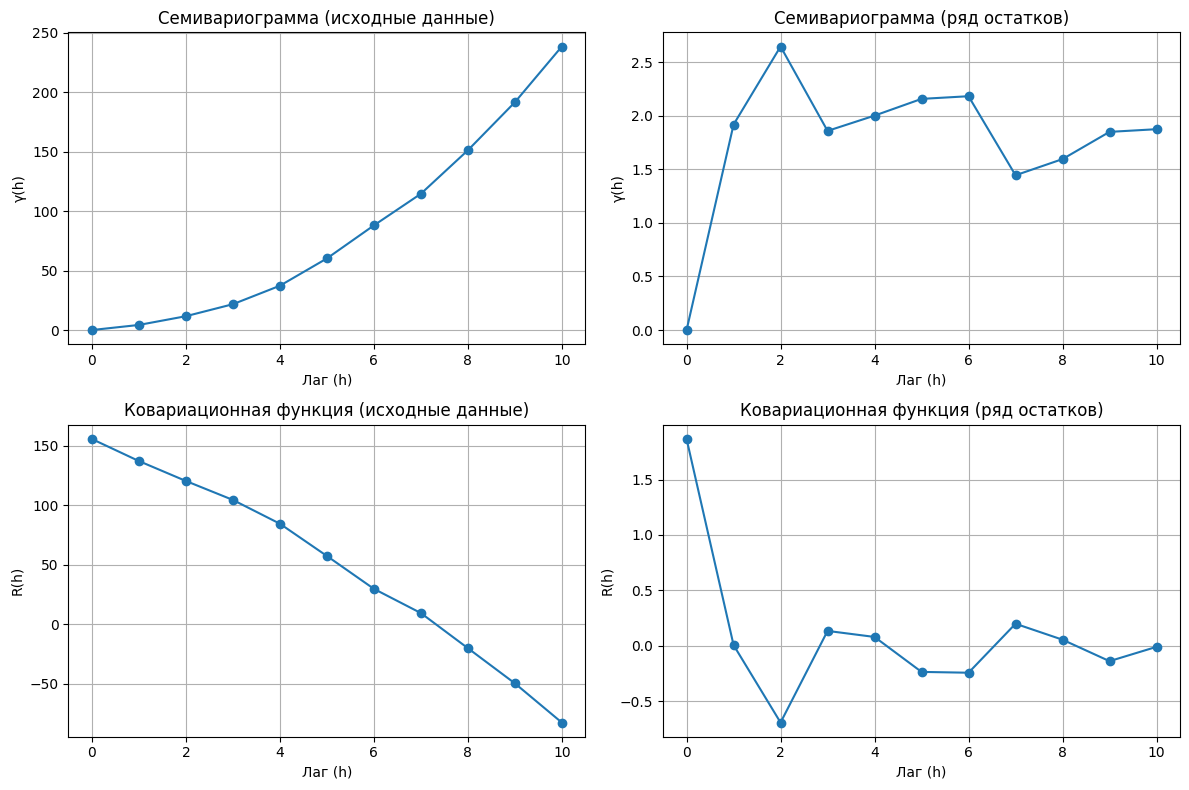

1


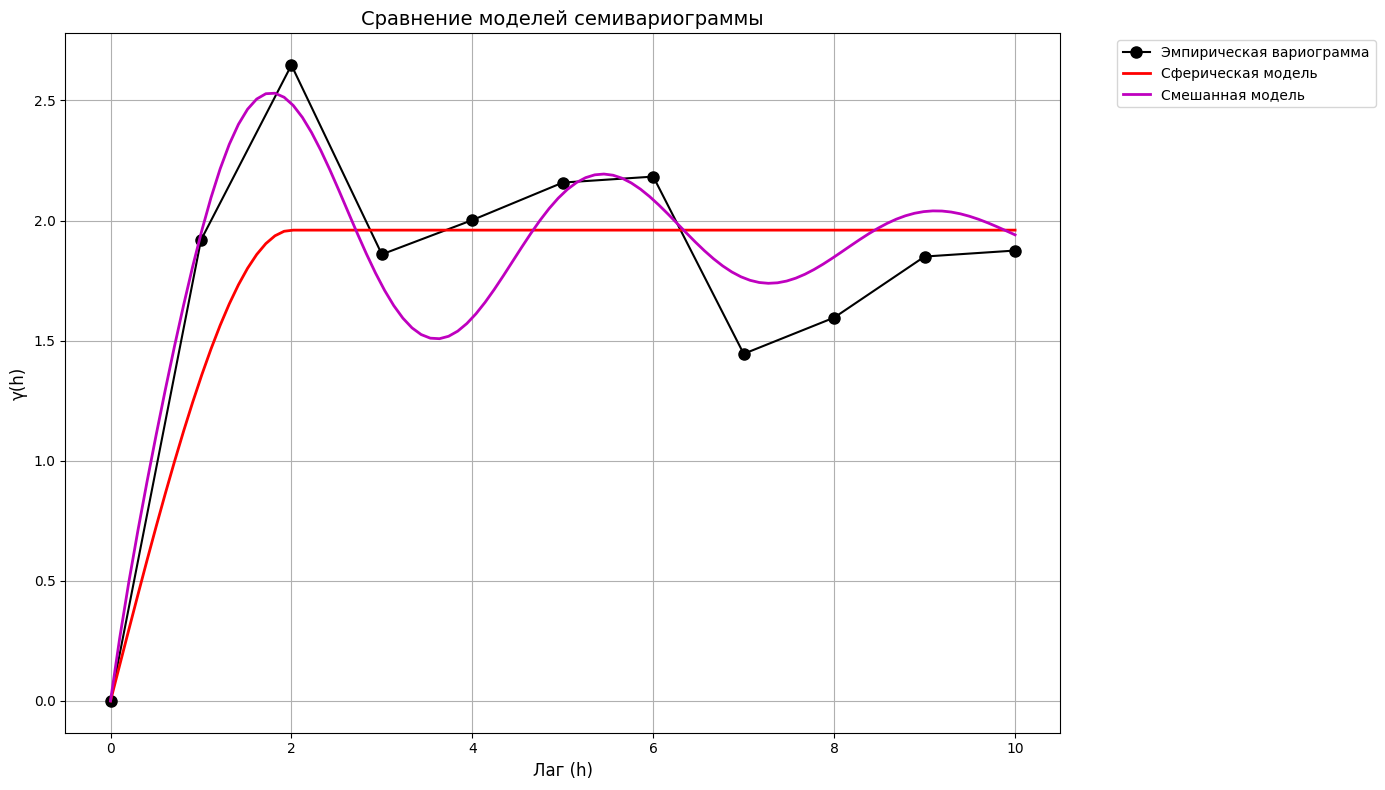

Параметры сферической модели:
{'nugget': 0.0, 'sill': 1.96, 'range_': 2.0}

Параметры смешанной модели:
{'C0': 0.0, 'C1': 0.99, 'a1': 0.39, 'C2': 0.93, 'a2': 3.68, 'a3': 4.48}


In [1]:
#4. Оценка ковариационной функции и семивариограммы
import numpy as np
import matplotlib.pyplot as plt

original_data = np.array([
    6.7, 9.2, 11.9, 13.1, 15.9, 18.3, 20.7, 23.0, 25.3, 26.2,
    29.4, 32.1, 35.3, 32.6, 39.7, 42.9, 41.2, 42.3, 44.4, 48.0
])

residuals = np.array([
    -1.21, -0.71, -0.01, -0.81, -0.01, 0.39, 0.79, 1.09, 1.39, 0.29,
    -0.51, 0.19, 1.39, -3.31, 1.79, 2.99, -0.71, -1.61, -1.51, 0.09
])

n = len(original_data)

def semivariogram(data, h_max):
    gamma = np.zeros(h_max + 1)
    for h in range(h_max + 1):
        sum_diff = 0.0
        count = 0
        for s in range(n - h):
            sum_diff += (data[s + h] - data[s]) ** 2
            count += 1
        if count > 0:
            gamma[h] = sum_diff / (2 * count)
    return gamma

def covariance_function(data, h_max):
    R = np.zeros(h_max + 1)
    mu = np.mean(data)
    for h in range(h_max + 1):
        sum_cov = 0.0
        count = 0
        for s in range(n - h):
            sum_cov += (data[s + h] - mu) * (data[s] - mu)
            count += 1
        if count > 0:
            R[h] = sum_cov / count
    return R

h_max = 10
gamma_original = semivariogram(original_data, h_max)
gamma_residuals = semivariogram(residuals, h_max)
R_original = covariance_function(original_data, h_max)
R_residuals = covariance_function(residuals, h_max)

lags = np.arange(h_max + 1)

plt.figure(figsize=(12, 8))

# Графики семивариограммы
plt.subplot(2, 2, 1)
plt.plot(lags, gamma_original, 'o-', label='Исходные данные')
plt.title('Семивариограмма (исходные данные)')
plt.xlabel('Лаг (h)')
plt.ylabel('γ(h)')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(lags, gamma_residuals, 'o-', label='Ряд остатков')
plt.title('Семивариограмма (ряд остатков)')
plt.xlabel('Лаг (h)')
plt.ylabel('γ(h)')
plt.grid()

# Графики ковариационной функции
plt.subplot(2, 2, 3)
plt.plot(lags, R_original, 'o-', label='Исходные данные')
plt.title('Ковариационная функция (исходные данные)')
plt.xlabel('Лаг (h)')
plt.ylabel('R(h)')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(lags, R_residuals, 'o-', label='Ряд остатков')
plt.title('Ковариационная функция (ряд остатков)')
plt.xlabel('Лаг (h)')
plt.ylabel('R(h)')
plt.grid()

plt.tight_layout()
plt.show()

def correlation_interval(covariance):
    h_corr = 0
    while h_corr < len(covariance) and covariance[h_corr] > 0:
        h_corr += 1
    return h_corr - 1
    
h_corr_residuals = correlation_interval(R_residuals)
print(h_corr_residuals)

#5. Сравнение моделей
spherical_params = {
    'nugget': 0.0,
    'sill': 1.96,
    'range_': 2.0
}

mixed_model_params = {
    'C0': 0.0,
    'C1': 0.99,
    'a1': 0.39,
    'C2': 0.93,
    'a2': 3.68,
    'a3': 4.48
}

def spherical(h, nugget, sill, range_):
    return nugget + (sill - nugget) * ((3*h)/(2*range_) - (h**3)/(2*range_**3)) * (h <= range_) + (sill - nugget) * (h > range_)

def mixed_model(h, C0, C1, a1, C2, a2, a3):
    exp_term = C1 * (1 - np.exp(-h/a1))
    periodic_term = C2 * (1 - np.cos(2*np.pi*h/a2) * np.exp(-h/a3))
    return C0 + exp_term + periodic_term

h_plot = np.linspace(0, h_max, 100)
spherical_values = spherical(h_plot, **spherical_params)
mixed_values = mixed_model(h_plot, **mixed_model_params)

plt.figure(figsize=(14, 8))

plt.plot(lags, gamma_residuals, 'ko-', label='Эмпирическая вариограмма', markersize=8)

# Модельные вариограммы
plt.plot(h_plot, spherical_values, 'r-', linewidth=2, 
         label=f'Сферическая модель')

plt.plot(h_plot, mixed_values, 'm-', linewidth=2, 
         label=f'Смешанная модель')

plt.xlabel('Лаг (h)', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.title('Сравнение моделей семивариограммы', fontsize=14)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Параметры сферической модели:")
print(spherical_params)
print("\nПараметры смешанной модели:")
print(mixed_model_params)
